# Day 1 - Data Exploration

### Questions to answer

- understand the shape of data
- understand objects: understand how many individuals are part of the study? 
- undetsand what the columns are telling us 
- get understanding of quality of data
- do we need a unique ID per person? 

### Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path = '/Users/bernadettebrandner/code/bernadetti0/predicting_activity/raw_data/aw_fb_data.csv'

In [3]:
data = pd.read_csv(path)
data.tail()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
6259,6260,3666,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6263,6264,3670,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs


<Axes: xlabel='sd_norm_heart', ylabel='Count'>

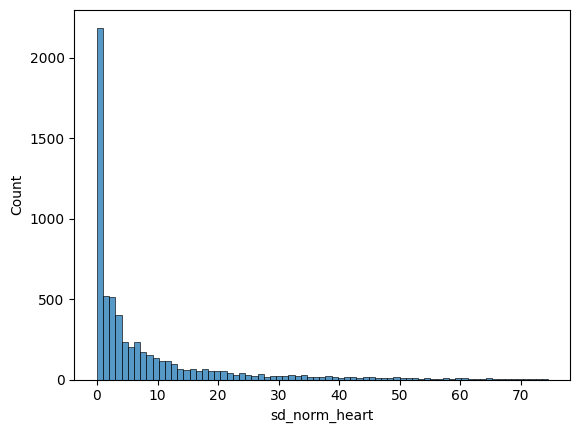

In [4]:
var = data.sd_norm_heart
sns.histplot(var)

- corr_heart is a correlation
- intensity carvonen looks suspicious --> it has the value 0 even though the person is running

<Axes: xlabel='norm_heart', ylabel='Count'>

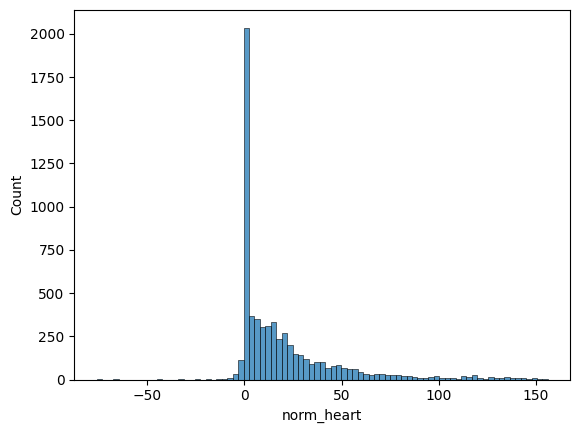

In [5]:
sns.histplot(data.norm_heart)

<Axes: xlabel='norm_heart', ylabel='hear_rate'>

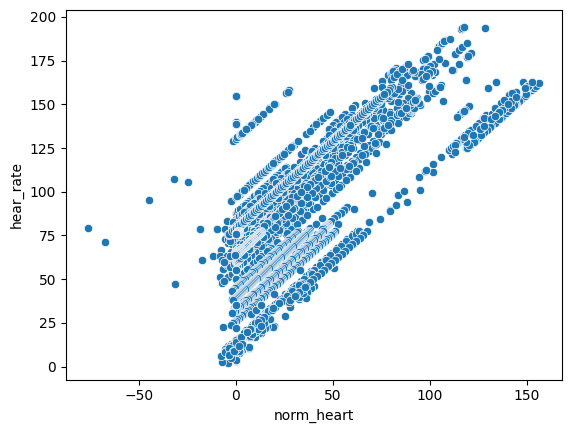

In [6]:
sns.scatterplot(x =data['norm_heart'], y=data['hear_rate'])

# Clean dataset

In [7]:
data_new = data.copy()  # Make a copy of the original DataFrame
data_new.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
data_new.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)


In [8]:
duplicates = data_new[data_new.duplicated() == True] # --> no duplicates

In [9]:
data_new.isnull().sum().any() # --> no null values

False

In [10]:
data_new.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   heart_rate            6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_steps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

# Feature Engineering

### Create a unique identifyer for each participant

In [11]:
data_new.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [12]:
#data_new.insert(loc=0, column='participant_id', value = data_new.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [13]:
data_new.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


### Create a BMI column

In [14]:
data_new['bmi'] = round(data_new.weight / (data_new.height/100)**2)
data_new.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


# Encoding and Scaling

In [15]:
# Data Transformation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [27]:
le = LabelEncoder()
le.fit(data_new.device)
data_new.device = le.transform(data_new.device)
le.fit(data_new.activity)
data_new.activity = le.transform(data_new.activity)
data_new.tail()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
6259,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,-44.402359,-18.190347,-2.221683,0.227745,-0.378744,-0.393611,-0.307331,-0.132897,1,3,1.25
6260,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,-44.402359,-18.190347,-2.221683,0.227745,-0.378744,-0.393611,-0.201117,-0.132897,1,3,1.25
6261,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,-44.402359,-18.190347,-2.221683,0.227745,-0.378744,-0.393611,-0.201117,-0.132897,1,3,1.25
6262,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,-44.402359,-18.190347,-2.221683,0.227745,-0.378744,-0.393611,-0.201117,-0.132897,1,3,1.25
6263,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,-44.402359,-18.190347,-2.221683,0.227745,-0.378744,-0.393611,-0.201117,-0.132897,1,3,1.25


In [17]:
#ohe = OneHotEncoder(sparse_output = False)

#ohe.fit(data_new[['activity']])
#data_new[ohe.get_feature_names_out()] = ohe.transform(data_new[['activity']])
#data_new.drop(columns = 'activity', inplace = True)

#data_new[['activity', 'activity_le']].tail(40)

In [20]:
data_new.describe()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239,0.416347,2.315134,24.044540
std,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530,0.492992,1.736421,3.228253
min,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690,0.000000,0.000000,16.000000
25%,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260,0.000000,1.000000,22.000000
50%,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619,0.000000,2.000000,24.000000
75%,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562,1.000000,4.000000,26.000000
max,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000,1.000000,5.000000,34.000000


# Splitting the dataset

In [ ]:
data_apple = data_new[data_new.device == 0.0]
data_fitbit = data_new[data_new.device == 1.0]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_apple, test_size =0.3, random_state = 42)

In [21]:
#Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(data_new)

original_column_names = data_new.columns
data_new = pd.DataFrame(scaler.transform(data_new), columns=original_column_names)

data_new.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,-0.8,1.0,0.0,-0.150289,0.006748,0.062957,-0.184955,-0.011060,0.228023,-0.12068,-0.888673,0.227745,0.374532,0.291966,-0.201117,-0.142678,0.0,-0.666667,-0.25
1,-0.8,1.0,0.0,-0.150289,0.013738,0.059076,-0.036044,-0.011023,0.228023,-0.12068,-0.888673,0.227745,0.371528,0.289231,-0.201117,-0.142545,0.0,-0.666667,-0.25
2,-0.8,1.0,0.0,-0.150289,0.020729,0.063432,0.277472,-0.010987,0.228023,-0.12068,-0.888673,0.227745,0.374900,0.292300,-0.201117,-0.142403,0.0,-0.666667,-0.25
3,-0.8,1.0,0.0,-0.150289,0.027720,0.067788,0.311400,-0.010951,0.228023,-0.12068,-0.888673,0.227745,0.378272,0.295369,-0.201117,-0.142252,0.0,-0.666667,-0.25
4,-0.8,1.0,0.0,-0.150289,0.034711,0.072144,0.345328,-0.010914,0.228023,-0.12068,-0.888673,0.216033,0.381644,0.298438,-0.281673,-0.142093,0.0,-0.666667,-0.25


# Feature Selection 

### Checking the pearson correlation

correlation_matrix = data_new.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels = column_names)


#Remove selfcorrelation 
corr_df = correlation_matrix.stack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'correlation']
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]


In [26]:
data_core_features = data_new[['age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi',
      'activity']]

data_core_features

,age,gender,height,weight,steps,heart_rate,calories,distance,bmi,activity
0,-0.8,1.0,0.000,-0.150289,0.006748,0.062957,-0.184955,-0.011060,-0.25,-0.666667
1,-0.8,1.0,0.000,-0.150289,0.013738,0.059076,-0.036044,-0.011023,-0.25,-0.666667
2,-0.8,1.0,0.000,-0.150289,0.020729,0.063432,0.277472,-0.010987,-0.25,-0.666667
3,-0.8,1.0,0.000,-0.150289,0.027720,0.067788,0.311400,-0.010951,-0.25,-0.666667
4,-0.8,1.0,0.000,-0.150289,0.034711,0.072144,0.345328,-0.010914,-0.25,-0.666667
...,...,...,...,...,...,...,...,...,...,...
6259,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,1.25,0.333333
6260,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,1.25,0.333333
6261,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,1.25,0.333333
6262,1.8,0.0,-0.525,0.196532,-0.090299,-2.105904,0.834846,0.052193,1.25,0.333333


In [ ]:
sns.pairplot(data_core_features, corner = True)

In [ ]:
corr = data_core_features.corr()
sns.heatmap(corr, annot = False)

# Splitting Devices

In [ ]:
data_new.device.dtypes

In [ ]:
data_apple = data_new[data_new.device == 0.0]
data_fitbit = data_new[data_new.device == 1.0]

In [ ]:
data_apple.shape

# Apple Watch

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_apple, test_size =0.3, random_state = 42)